## An√°lise Explorat√≥ria do dataset SQuAD

In [ ]:
# Montando gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Movendo arquivos do gdrive para a pasta raiz do projeto:
# Dataset de Treinamento
!cp "/content/drive/MyDrive/squad_pt/squad-train-v1.1.json" /content/
# Dataset de Valida√ß√£o
!cp "/content/drive/MyDrive/squad_pt/squad-dev-v1.1.json" /content/
# Fun√ß√£o para converter o dataset SQuAD do formato json para dataframe
# Fonte: https://gist.github.com/vgaraujov/fd17b0c151657fbce73189a98617f1c6
!cp "/content/drive/MyDrive/squad_pt/squad_utils_v1.py" /content/

In [ ]:
# Importando fun√ß√£o json para dataframe
import squad_utils_v1
# Lendo os datasets de Treinamento e Valida√ß√£o
trein_data = squad_utils_v1.json_to_dataframe('squad-train-v1.1.json')
valid_data = squad_utils_v1.json_to_dataframe('squad-dev-v1.1.json')

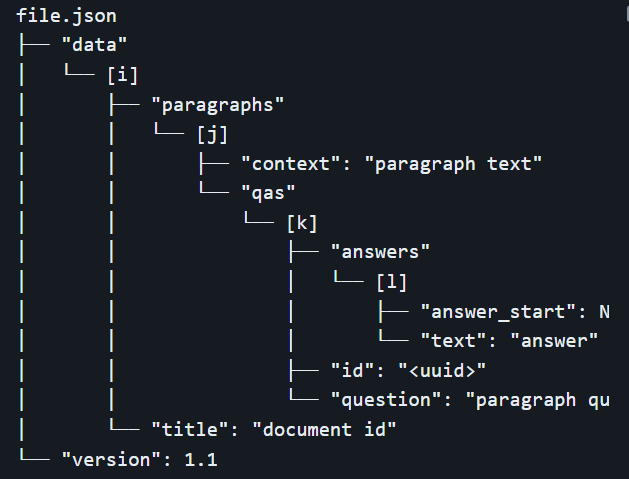

A 1¬™ vers√£o do conjunto de dados "Stanford Question Answering Dataset" ([SQuAD](https://drive.google.com/file/d/1Q0IaIlv2h2BC468MwUFmUST0EyN7gNkn/view)), para **tarefa de perguntas e respostas extrativas**, foi desenvolvido em 2016. Ele utiliza perguntas geradas a partir de **536 artigos da Wikipedia*** com **mais de 100.000 linhas** de dados. √â constru√≠do na forma de uma pergunta e um contexto dos artigos da Wikipedia contendo a resposta √† pergunta. [[1]](https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1174/reports/2761899.pdf)    
Originalmente este dataset foi constru√≠do no idioma ingl√™s, contudo, o grupo [Deep Learning Brasil](http://www.deeplearningbrasil.com.br/) o traduziu automaticamente e fez os ajustes manuais, gastando para isto cerca de 2 meses. [[2]](https://sol.sbc.org.br/index.php/kdmile/article/view/24974)

In [ ]:
# Vis√£o do dataset de treinamento
trein_data.head(2)

Id                     title  \
0  5733be284776f41900661182  University_of_Notre_Dame   
1  5733be284776f41900661180  University_of_Notre_Dame   

                                             context  \
0  Arquitetonicamente, a escola tem um car√°ter ca...   
1  Arquitetonicamente, a escola tem um car√°ter ca...   

                                            question  ans_start  \
0  A quem a Virgem Maria supostamente apareceu em...        533   
1  A Bas√≠lica do Sagrado Cora√ß√£o de Notre Dame fi...        314   

                         text  
0  Santa Bernadette Soubirous  
1        o edif√≠cio principal

In [ ]:
# Vis√£o do dataset de valida√ß√£o
valid_data.head(2)

Id          title  \
0  56be4db0acb8001400a502ec  Super_Bowl_50   
3  56be4db0acb8001400a502ed  Super_Bowl_50   

                                             context  \
0  O Super Bowl 50 foi um jogo de futebol america...   
3  O Super Bowl 50 foi um jogo de futebol america...   

                                            question  ans_start  \
0  Qual time da NFL representou a AFC no Super Bo...        208   
3  Qual time da NFL representou a NFC no Super Bo...        295   

                text  
0     Denver Broncos  
3  Carolina Panthers

## Dataset de Treinamento

In [ ]:
# Vis√£o do dataset de treinamento
trein_data.head(2)

Id                     title  \
0  5733be284776f41900661182  University_of_Notre_Dame   
1  5733be284776f41900661180  University_of_Notre_Dame   

                                             context  \
0  Arquitetonicamente, a escola tem um car√°ter ca...   
1  Arquitetonicamente, a escola tem um car√°ter ca...   

                                            question  ans_start  \
0  A quem a Virgem Maria supostamente apareceu em...        533   
1  A Bas√≠lica do Sagrado Cora√ß√£o de Notre Dame fi...        314   

                         text  
0  Santa Bernadette Soubirous  
1        o edif√≠cio principal

In [ ]:
# Contando a quantidade de valores
trein_data.count()

Id           87510
title        87510
context      87510
question     87510
ans_start    87510
text         87510
dtype: int64

### Todas os 4 registros possuem 87.510 valores, aparentemente, n√£o h√° dados fantantes! Contudo, podem existir "nan" ou strings vazias " " ...

In [ ]:
# Contados dados none ou nan
trein_data.isna().sum()

Id           0
title        0
context      0
question     0
ans_start    0
text         0
dtype: int64

In [ ]:
# Contados valores vazios (' ')
trein_data.isnull().sum()

Id           0
title        0
context      0
question     0
ans_start    0
text         0
dtype: int64

Realmente, n√£o h√° dados faltantes!

In [ ]:
# Contando a quantidade de valores √∫nicos
trein_data.nunique()

Id           87510
title          442
context      36815
question     87160
ans_start     1659
text         64571
dtype: int64

### O dataset de treinamento √© dividido em 442 assuntos (title). Estes assuntos possuem 36.815 contextos - que s√£o os textos que servem como refer√™ncia para as respostas √†s perguntas. Existen 87.160 perguntas (question) e 64.571 respostas (text). A √∫nica vari√°vel que n√£o possu√≠ dados repetidos √© o 'Id'.   
### Uma 1¬™ quest√£o √© por que existem mais perguntas do que respostas? Lembrando que, conforme verificado anteriormente, n√£o h√° dados faltantes.

In [ ]:
# Visualizando s√≥ as perguntas e respostas ...
trein_data[['question','text']]

question  \
0      A quem a Virgem Maria supostamente apareceu em...   
1      A Bas√≠lica do Sagrado Cora√ß√£o de Notre Dame fi...   
2      O que fica no topo do edif√≠cio principal em No...   
3      Com que frequ√™ncia o Malabarista de Notre Dame...   
4      Quantos jornais de estudantes s√£o encontrados ...   
...                                                  ...   
87505  Qual √© o outro nome para o culto aos antepassa...   
87506  Quem ajudou o Nepal a reformar o Est√°dio Dasar...   
87507  Por que viajar em Catmandu √© principalmente de...   
87508         Quem opera voos entre Catmandu e Istambul?   
87509                       De que KMC √© um inicialismo?   

                                      text  
0               Santa Bernadette Soubirous  
1                     o edif√≠cio principal  
2      uma est√°tua de ouro da Virgem Maria  
3                               duas vezes  
4                                     tr√™s  
...                                    ...  
87505                        culto a Ajima  
87506                               chin√™s  
87507                   terreno acidentado  
87508             companhias a√©reas turcas  
87509     Cidade Metropolitana de Catmandu  

[87510 rows x 2 columns]

### Observando as respostas (text) nota-se que muitas delas s√£o comuns para v√°rias perguntas, como por exemplo: "Em que ano o primeiro pa√≠s comunista abriu suas fronteiras a todos os visitantes estrangeiros?"; "Quando Tito come√ßou a promover uma resolu√ß√£o pac√≠fica para o conflito √°rabe-israelense?"; e "Em que ano Tito come√ßou a trabalhar nos processos de paz israelense √°rabe?", onde o ano de 1967 responde todas elas. Assim, isto explica termos mais perguntas que respostas √∫nicas!

In [ ]:
# Dos 442 assuntos, como os 36.815 contextos est√£o distribuidos?
# Agrupando os contextos por assuntos (title)
title_context = trein_data.groupby('title')[['context']]
# Verificando as assuntos com mais contextos
title_context.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=False).head(3)

QdeContext
title                    
New_York_City         817
American_Idol         802
Beyonc√©               756

In [ ]:
# Verificando as assuntos com menos contextos
title_context.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=True).head(3)

QdeContext
title                            
Myocardial_infarction          22
Matter                         24
Pitch_(music)                  36

In [ ]:
# Importando a bliblioteca para NLP
import spacy
import spacy.cli
spacy.cli.download("pt_core_news_sm")
nlp = spacy.load('pt_core_news_sm')

‚úî Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Criando um dataframe s√≥ com os contextos
contexts = trein_data['context']
# Criando uma lista com os contextos √∫nicos
contexts_unico = list(set(contexts))

In [ ]:
# Intera toda a lista de contextos calculando a quantidade de tokens de cada um deles
contexts_unico_total_tokens = [len(nlp(item))for item in contexts_unico]

In [ ]:
import pandas as pd
# Cria novo dataframe com os contextos e suas quantidades de tokens
contexto_QdeTokens_trein = pd.DataFrame(list(zip(contexts_unico,
                                           contexts_unico_total_tokens)), columns=['Contexto', 'QdeTokens'])

In [ ]:
# Salva arquivo no disco
contexto_QdeTokens_trein.to_csv('contexto_QdeTokens_trein.csv', encoding='utf-8')
!cp contexto_QdeTokens_trein.csv "/content/drive/MyDrive/squad_pt/contexto_QdeTokens_trein.csv"

In [ ]:
# An√°lise descritiva geral
contexto_QdeTokens_trein.describe()

QdeTokens
count  36815.000000
mean     141.512536
std       59.547506
min       22.000000
25%      105.000000
50%      130.000000
75%      168.000000
max      854.000000

### Dos 36.815 valores √∫nicos de contextos, o m√©dia de tokens √© aproximadamente 142 tokens, com desvio padr√£o de aproximadamente 60 tokens.
### O contexto mais curto possui 22 tokens, o mais longo possui 854 tokens. A mediana de tokens √© 130.

## Dataset de Valida√ß√£o

In [ ]:
# Vis√£o do dataset de valida√ß√£o
valid_data.head(2)

Id          title  \
0  56be4db0acb8001400a502ec  Super_Bowl_50   
3  56be4db0acb8001400a502ed  Super_Bowl_50   

                                             context  \
0  O Super Bowl 50 foi um jogo de futebol america...   
3  O Super Bowl 50 foi um jogo de futebol america...   

                                            question  ans_start  \
0  Qual time da NFL representou a AFC no Super Bo...        208   
3  Qual time da NFL representou a NFC no Super Bo...        295   

                text  
0     Denver Broncos  
3  Carolina Panthers

In [ ]:
# Contando a quantidade de valores
valid_data.count()

Id           17853
title        17853
context      17853
question     17853
ans_start    17853
text         17853
dtype: int64

### Todas os 4 registros possuem 17.853 valores, aparentemente, n√£o h√° dados fantantes! Contudo, podem existir "nan", verificando ...

In [ ]:
# Contados dados none ou nan
valid_data.isna().sum()

Id           0
title        0
context      0
question     0
ans_start    0
text         0
dtype: int64

In [ ]:
# Contados valores vazios (' ')
valid_data.isnull().sum()

Id           0
title        0
context      0
question     0
ans_start    0
text         0
dtype: int64

Realmente, n√£o h√° dados fantantes!

In [ ]:
# Contando a quantidade de valores √∫nicos
valid_data.nunique()

Id           10570
title           48
context       5644
question     10521
ans_start     1344
text         14545
dtype: int64

### O dataset de valida√ß√£o √© dividido em 48 assuntos (title). Estes assuntos possuem 5.644 contextos. Existem 10.521 perguntas (question) e 14.545 respostas (text).
### Diferentemente do conjunto de treino, aqui existem mais respostas do que perguntas, por que?

In [ ]:
# Visualizando s√≥ as perguntas e respostas ...
valid_data[['question','text']]

question  \
0      Qual time da NFL representou a AFC no Super Bo...   
3      Qual time da NFL representou a NFC no Super Bo...   
6                        Onde aconteceu o Super Bowl 50?   
7                        Onde aconteceu o Super Bowl 50?   
8               Qual time da NFL venceu o Super Bowl 50?   
...                                                  ...   
34720  Tens√£o, compress√£o e arrasto s√£o que tipo de f...   
34722  Qual √© a lei da termodin√¢mica associada √† troc...   
34723  Qual √© a lei da termodin√¢mica associada √† troc...   
34724   Qual √© o termo m√©trico menos usado que o Newton?   
34725   Qual √© o termo m√©trico menos usado que o Newton?   

                                                    text  
0                                         Denver Broncos  
3                                      Carolina Panthers  
6                                Santa Clara, Calif√≥rnia  
7      Levi's Stadium na √°rea da Ba√≠a de S√£o Francisc...  
8                                         Denver Broncos  
...                                                  ...  
34720                                    n√£o conservador  
34722                       Segunda lei da termodin√¢mica  
34723                                        Segunda lei  
34724                                        libra-for√ßa  
34725                               o quilograma-for√ßa (  

[17853 rows x 2 columns]

### Observando as quest√µes nota-se que muitas delas s√£o identicas, s√≥ mudando a resposta, por exemplo: respondendo em valores num√©ricos ou por extenso. Assim, isto explica termos mais respostas que perguntas.

In [ ]:
# Dos 48 assuntos, como os 5.644 contextos est√£o distribuidos?
# Agrupando os contextos por assuntos (title)
title_context = valid_data.groupby('title')[['context']]
# Verificando as assuntos com mais contextos
title_context.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=False).head(3)

QdeContext
title                    
Super_Bowl_50        1349
Martin_Luther         874
Nikola_Tesla          820

In [ ]:
# Verificando as assuntos com menos contextos
title_context.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=True).head(3)

QdeContext
title                            
Construction                  151
Jacksonville,_Florida         156
Private_school                159

In [ ]:
# Criando um dataframe s√≥ com os contextos
contexts = valid_data['context']
# Criando uma lista com os contextos √∫nicos
contexts_unico = list(set(contexts))

In [ ]:
# Intera toda a lista de contextos calculando a quantidade de tokens de cada um deles
contexts_unico_total_tokens = [len(nlp(item))for item in contexts_unico]

In [ ]:
# Cria novo dataframe com os contextos e suas quantidades de tokens
contexto_QdeTokens_valid = pd.DataFrame(list(zip(contexts_unico,
                                           contexts_unico_total_tokens)), columns=['Contexto', 'QdeTokens'])

In [ ]:
# Salva arquivo no disco
contexto_QdeTokens_valid.to_csv('contexto_QdeTokens_valid.csv', encoding='utf-8')
!cp contexto_QdeTokens_valid.csv "/content/drive/MyDrive/squad_pt/contexto_QdeTokens_valid.csv"

In [ ]:
# An√°lise descritiva geral
contexto_QdeTokens_valid.describe()

QdeTokens
count  5644.000000
mean    148.026931
std      65.431934
min      26.000000
25%     109.000000
50%     135.000000
75%     173.000000
max     749.000000

### Dos 5.644 valores √∫nicos de contextos, a m√©dia de tokens √© aproximadamente 148 tokens, com desvio padr√£o de aproximadamente 65 tokens.
### O contexto mais curto possui 26 tokens, o mais longo possui 749 tokens. A mediana de tokens √© 135.

## Conclus√µes

Conforme verificado acima, s√£o fornecidos dois arquivos: **squad-train-v1.1.json** e  **squad-dev-v1.1.json**, sendo o primeiro para treinamento e o segundo para valida√ß√£o.   
Os arquivos possuem, respectivamente, as seguintes quantidades de registros: 87.510 e 17.853, totalizando assim: 105.363 registros. Percentualmente isto equivale a 83% dos dados para treinamento e 17% dos dados para valida√ß√£o.   
No universo de Machine Learning, √© comum a divis√£o dos datasets em: Treinamento; Valida√ß√£o; e Testes. Assim, por que aqui n√£o foi fornecido os dados de Testes?   
Pesquisando em [[1]](https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1174/reports/2761899.pdf), temos:
> "[...] Utilizamos 80% do conjunto de dados para treinar o modelo, 10% para valida√ß√£o e ajuste hiperpar√¢metro. **Os 10% finais do conjunto de dados s√£o reservados para testes** e **mantidos privados** pelos criadores da equipe com o objetivo de preservar a integridade dos modelos de resposta a perguntas."    

Portanto, **os autores n√£o disponibilizaram os 10% de dados para testes**. Sendo assim, **o grupo vai desenvolver duas estrat√©gias:**
  - 1¬™) Juntar os dados de treinamento e valida√ß√£o e depois redividi-los aleatoriamente em Treinamento (80%), Valida√ß√£o (10%) e Testes (10%);
  - 2¬™) Manter os dados originais de treinamento e dividir o conjunto de valida√ß√£o em duas partes: valida√ß√£o (10 mil registros (9,5%) dos dados) e testes (7853 registros (7,4%) dos dados).
  
Com rela√ß√£o √† **quantidade m√°xima** de tokens identificada no campo contexto, temos: **854 tokens** para o conjunto de treinamento e **749 tokens** para o conjunto de valida√ß√£o. Assim, aparentemente n√£o teremos problemas, uma vez que o SLM [Phi-2](https://huggingface.co/microsoft/phi-2) possui [Context length](https://symbl.ai/developers/blog/guide-to-context-in-llms/) de **2048 tokens**.


## 1¬™ Estrat√©gia - Reajustando o dataset

In [ ]:
# Unindo os datasets de treinamento e valida√ß√£o
dataset = pd.concat([trein_data, valid_data])

In [ ]:
# Redefinindo o dataset
# 80% Treinamento, 10% Valida√ß√£o e 10% Testes
# https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test/38251213#38251213
import numpy as np
train, validate, test = np.split(dataset.sample(frac=1, random_state=42),[int(.8*len(dataset)), int(.9*len(dataset))])

In [ ]:
print("Total de dados: ", len(dataset))

Total de dados:  105363


In [ ]:
print("Percentual de dados treinamento: ", round(len(train)/len(dataset)*100,1))

Percentual de dados treinamento:  80.0


In [ ]:
print("Percentual de dados valida√ß√£o: ", round(len(validate)/len(dataset)*100,1))

Percentual de dados valida√ß√£o:  10.0


In [ ]:
print("Percentual de dados testes: ", round(len(test)/len(dataset)*100,1))

Percentual de dados testes:  10.0


Ser√° que os dados ficaram balanceados, isto √©, os assuntos (title) est√£o distribuidos em todas as 3 parti√ß√µes de dados?

In [ ]:
train['title'].nunique()

490

In [ ]:
validate['title'].nunique()

490

In [ ]:
test['title'].nunique()

489

Conforme observado acima, sim, os dados est√£o balenceados!

In [ ]:
# Salva arquivo no disco
train.to_csv('squad_BR_train.csv', encoding='utf-8', index = False)
!cp squad_BR_train.csv "/content/drive/MyDrive/squad_pt/squad_BR_train.csv"
validate.to_csv('squad_BR_valid.csv', encoding='utf-8', index = False)
!cp squad_BR_valid.csv "/content/drive/MyDrive/squad_pt/squad_BR_valid.csv"
test.to_csv('squad_BR_test.csv', encoding='utf-8', index = False)
!cp squad_BR_test.csv "/content/drive/MyDrive/squad_pt/squad_BR_test.csv"

In [ ]:
# Como os contextos est√£o distribuidos nas parti√ß√µes de dados?
# Agrupando os contextos por assuntos (title)
title_context_train = train.groupby('title')[['context']]
# Verificando as assuntos com mais contextos
title_context_train.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=False).head(5)

QdeContext
title                    
Super_Bowl_50        1066
Martin_Luther         693
New_York_City         659
Nikola_Tesla          650
American_Idol         633

In [ ]:
# Agrupando os contextos por assuntos (title)
title_context_validate = validate.groupby('title')[['context']]
# Verificando as assuntos com mais contextos
title_context_validate.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=False).head(5)

QdeContext
title                    
Super_Bowl_50         154
New_York_City          87
American_Idol          86
Martin_Luther          85
Nikola_Tesla           82

In [ ]:
# Agrupando os contextos por assuntos (title)
title_context_test = test.groupby('title')[['context']]
# Verificando as assuntos com mais contextos
title_context_test.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=False).head(5)

QdeContext
title                    
Super_Bowl_50         129
Martin_Luther          96
Nikola_Tesla           88
American_Idol          83
Beyonc√©                81

*Os* top 5 assuntos, praticamente foram os mesmos nas 3 parti√ß√µes de dados!

In [ ]:
# Criando um dataframe s√≥ com os contextos
contexts = train['context']
# Criando uma lista com os contextos √∫nicos
contexts_unico = list(set(contexts))

In [ ]:
# Intera toda a lista de contextos calculando a quantidade de tokens de cada um deles
contexts_unico_total_tokens = [len(nlp(item))for item in contexts_unico]

In [ ]:
# Cria novo dataframe com os contextos e suas quantidades de tokens
contexto_QdeTokens_train = pd.DataFrame(list(zip(contexts_unico,
                                           contexts_unico_total_tokens)), columns=['Contexto', 'QdeTokens'])

In [ ]:
# An√°lise descritiva geral
contexto_QdeTokens_train.describe()

QdeTokens
count  35806.000000
mean     142.480953
std       60.150553
min       22.000000
25%      105.000000
50%      131.000000
75%      169.000000
max      854.000000

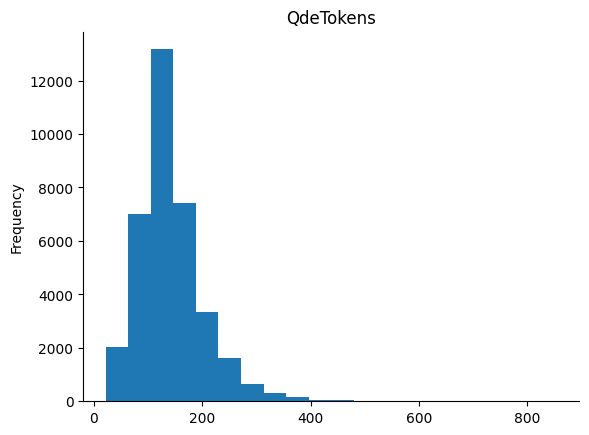

In [ ]:
# Histograma da distribui√ß√£o de tokens
from matplotlib import pyplot as plt
contexto_QdeTokens_train['QdeTokens'].plot(kind='hist', bins=20, title='QdeTokens')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Conforme histograma acima, 400 tokens atendem a grande maioria dos casos.  
**Detalhe: quanto menor este valor menos poder computacional √© exigido no processo de ajuste fino!**

### Os 3 arquivos csv gerados incorporados na plataforma [hunggingface](https://huggingface.co/datasets/vsvasconcelos/SQuAD-pt_BR-V1.1)



In [ ]:
# Importando o dataset do huggingface
!pip install datasets
from datasets import load_dataset

dataset = load_dataset("vsvasconcelos/SQuAD-pt_BR-V1.1")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 84290
    })
    validation: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 10536
    })
    test: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 10537
    })
})

## 2¬™ Estrat√©gia - Reajustando os dados de valida√ß√£o

In [ ]:
# O dataset de treinamento √© preservado!
train = trein_data

In [ ]:
# Pegando as 1¬™ 10K linhas para valida√ß√£o
validate = valid_data[:10000]
validate.head(1)

Id          title  \
0  56be4db0acb8001400a502ec  Super_Bowl_50   

                                             context  \
0  O Super Bowl 50 foi um jogo de futebol america...   

                                            question  ans_start  \
0  Qual time da NFL representou a AFC no Super Bo...        208   

             text  
0  Denver Broncos

In [ ]:
validate.tail(1)

Id                          title  \
19427  572746d3dd62a815002e9a69  American_Broadcasting_Company   

                                                 context  \
19427  Em abril de 1970, o Congresso aprovou a Lei de...   

                                                question  ans_start  \
19427  Quem foi nomeado presidente e CEO da ABC depoi...        398   

                 text  
19427  Regra de Elton

In [ ]:
len(validate)

10000

In [ ]:
# Pegando o restante dos dados originais de valida√ß√£o para testes
test = valid_data[10000:]

In [ ]:
test.head(1)

Id                          title  \
19430  572747dd5951b619008f87aa  American_Broadcasting_Company   

                                                 context  \
19430  No in√≠cio dos anos 70, Michael Eisner, que ing...   

                                                question  ans_start  \
19430  Que s√©rie ABC se originou como um segmento cur...        185   

               text  
19430  Dias felizes

In [ ]:
test.tail(1)

Id  title  \
34725  5737aafd1c456719005744fb  Force   

                                                 context  \
34725  A for√ßa da libra tem uma contrapartida m√©trica...   

                                               question  ans_start  \
34725  Qual √© o termo m√©trico menos usado que o Newton?         77   

                       text  
34725  o quilograma-for√ßa (

In [ ]:
len(test)

7853

In [ ]:
total_dados = len(train) + len(validate) + len(test)

In [ ]:
print("Total de dados: ", total_dados)

Total de dados:  105363


In [ ]:
print("Percentual de dados treinamento: ", round(len(train)/total_dados*100,0))

Percentual de dados treinamento:  83.0


In [ ]:
print("Percentual de dados valida√ß√£o: ", round(len(validate)/total_dados*100,1))

Percentual de dados valida√ß√£o:  9.5


In [ ]:
print("Percentual de dados de testes: ", round(len(test)/total_dados*100,1))

Percentual de dados de testes:  7.5


In [ ]:
train['title'].nunique()

442

In [ ]:
validate['title'].nunique()

25

In [ ]:
test['title'].nunique()

24

In [ ]:
# Como os contextos est√£o distribuidos nas parti√ß√µes de dados?
# Agrupando os contextos por assuntos (title)
title_context_train = train.groupby('title')[['context']]
# Verificando as assuntos com mais contextos
title_context_train.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=False).head(5)

QdeContext
title                      
New_York_City           817
American_Idol           802
Beyonc√©                 756
Fr√©d√©ric_Chopin         697
Queen_Victoria          680

In [ ]:
# Agrupando os contextos por assuntos (title)
title_context_validate = validate.groupby('title')[['context']]
# Verificando as assuntos com mais contextos
title_context_validate.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=False).head(5)

QdeContext
title                     
Super_Bowl_50         1349
Martin_Luther          874
Nikola_Tesla           820
Apollo_program         538
Oxygen                 482

In [ ]:
# Agrupando os contextos por assuntos (title)
title_context_test = test.groupby('title')[['context']]
# Verificando as assuntos com mais contextos
title_context_test.size().to_frame(name= 'QdeContext').sort_values(by=['QdeContext'], ascending=False).head(5)

QdeContext
title                            
Chloroplast                   529
Civil_disobedience            505
Economic_inequality           477
Rhine                         468
French_and_Indian_War         453

Os top 5 assuntos, s√£o totalmente diferentes em cada um dos conjuntos de dados!

In [ ]:
# Criando um dataframe s√≥ com os contextos
contexts = train['context']
# Criando uma lista com os contextos √∫nicos
contexts_unico = list(set(contexts))

In [ ]:
# Intera toda a lista de contextos calculando a quantidade de tokens de cada um deles
contexts_unico_total_tokens = [len(nlp(item))for item in contexts_unico]

In [ ]:
# Cria novo dataframe com os contextos e suas quantidades de tokens
contexto_QdeTokens_train = pd.DataFrame(list(zip(contexts_unico,
                                           contexts_unico_total_tokens)), columns=['Contexto', 'QdeTokens'])

In [ ]:
# An√°lise descritiva geral
contexto_QdeTokens_train.describe()

QdeTokens
count  36815.000000
mean     141.512536
std       59.547506
min       22.000000
25%      105.000000
50%      130.000000
75%      168.000000
max      854.000000

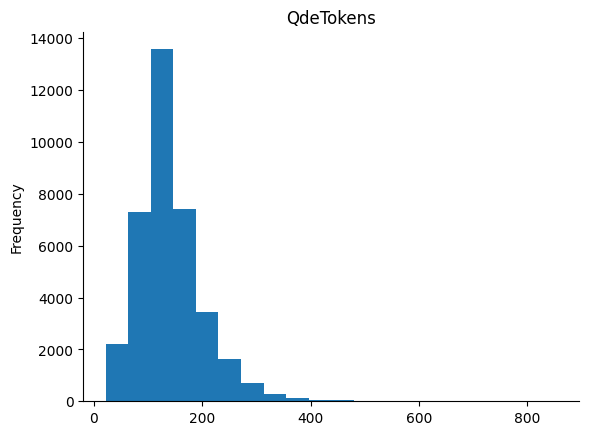

In [ ]:
contexto_QdeTokens_train['QdeTokens'].plot(kind='hist', bins=20, title='QdeTokens')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Salva arquivo no disco
train.to_csv('squad_BR_train_.csv', encoding='utf-8', index = False)
!cp squad_BR_train_.csv "/content/drive/MyDrive/squad_pt/squad_BR_train_.csv"
validate.to_csv('squad_BR_valid_.csv', encoding='utf-8', index = False)
!cp squad_BR_valid_.csv "/content/drive/MyDrive/squad_pt/squad_BR_valid_.csv"
test.to_csv('squad_BR_test_.csv', encoding='utf-8', index = False)
!cp squad_BR_test_.csv "/content/drive/MyDrive/squad_pt/squad_BR_test_.csv"


### Os 3 arquivos csv gerados incorporados na plataforma [hunggingface](https://huggingface.co/datasets/vsvasconcelos/SQuAD-pt_BR-V1.1_)

In [ ]:
# Importando o dataset do huggingface
#!pip install datasets
from datasets import load_dataset
dataset_v1_pt = load_dataset("vsvasconcelos/SQuAD-pt_BR-V1.1_")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset_v1_pt

DatasetDict({
    train: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text', 'context_length'],
        num_rows: 87510
    })
    validation: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text', 'context_length'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text', 'context_length'],
        num_rows: 7853
    })
})

In [ ]:
# Examinando uma amostra (500) aleat√≥ria dos dados
train_sample = dataset_v1_pt["train"].shuffle(seed=42).select(range(500))

In [ ]:
# Verificando um dado da amostra
train_sample[72]

{'Id': '56e09d01231d4119001ac2d3',
 'title': 'Hydrogen',
 'context': 'Um pr√≥ton nu, H +, n√£o pode existir em solu√ß√£o ou em cristais i√¥nicos, devido √† sua atra√ß√£o incontrol√°vel por outros √°tomos ou mol√©culas com el√©trons. Exceto nas altas temperaturas associadas aos plasmas, esses pr√≥tons n√£o podem ser removidos das nuvens de el√©trons de √°tomos e mol√©culas e permanecer√£o ligados a eles. No entanto, o termo \'pr√≥ton\' √© √†s vezes usado de maneira vaga e metaforicamente para se referir ao hidrog√™nio cati√¥nico ou carregado positivamente ligado a outras esp√©cies dessa maneira e, como tal, √© denotado "H +" sem nenhuma implica√ß√£o de que pr√≥tons existam livremente como esp√©cie.',
 'question': 'Qual √© outro termo para um pr√≥ton nu?',
 'ans_start': 14,
 'text': 'H +'}

In [ ]:
# Quantidade de titles
len(dataset_v1_pt["train"].unique('title'))

442

In [ ]:
# Quantidade de tokens do campo context
def compute_context_length(example):
    return {"context_length": len(example["context"].split())}

In [ ]:
dataset_v1_pt = dataset_v1_pt.map(compute_context_length)
# Inspect the first training example
dataset_v1_pt["train"][0]

Map:   0%|          | 0/87510 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7853 [00:00<?, ? examples/s]

{'Id': '5733be284776f41900661182',
 'title': 'University_of_Notre_Dame',
 'context': 'Arquitetonicamente, a escola tem um car√°ter cat√≥lico. No topo da c√∫pula de ouro do edif√≠cio principal est√° uma est√°tua de ouro da Virgem Maria. Imediatamente em frente ao edif√≠cio principal e de frente para ele, est√° uma est√°tua de Cristo de cobre com os bra√ßos erguidos com a lenda "Venite Ad Me Omnes". Ao lado do edif√≠cio principal √© a Bas√≠lica do Sagrado Cora√ß√£o. Imediatamente atr√°s da bas√≠lica fica a Gruta, um local mariano de ora√ß√£o e reflex√£o. √â uma r√©plica da gruta de Lourdes, na Fran√ßa, onde a Virgem Maria apareceu para Santa Bernadette Soubirous em 1858. No final da estrada principal (e em uma linha direta que liga tr√™s est√°tuas ao Domo de Ouro), existe uma est√°tua de pedra simples e moderna de Maria.',
 'question': 'A quem a Virgem Maria supostamente apareceu em 1858 em Lourdes, Fran√ßa?',
 'ans_start': 533,
 'text': 'Santa Bernadette Soubirous',
 'context_length': 1

<Axes: title={'center': 'context_length'}, ylabel='Frequency'>

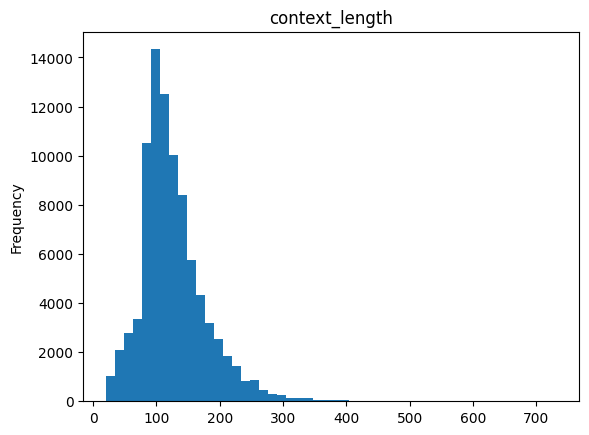

In [ ]:
# Transformando o dataset de treinamento em um dataframe Pandas
dataset_v1_pt_df = dataset_v1_pt["train"].to_pandas()
# Imprimindo o histograma de tokens do conjunto de treinamwento
dataset_v1_pt_df['context_length'].plot(kind='hist', bins=50, title='context_length')

# SQuAD v2.0



Conforme apresentado em [[3]](https://arxiv.org/pdf/1806.03822), um ponto negativo da 1¬™ vers√£o do dataset SQuAD √© que todas as quest√µes s√£o respond√≠veis por meio das declara√ß√µes do contexto. Contudo, nos casos reais, nem sempre isso acontece, assim, os sistemas podem responder com suposi√ß√µes n√£o confi√°veis sobre quest√µes para as quais a resposta correta n√£o √© declarada no contexto.

Neste sentido, a 2¬™ vers√£o do dataset, proposta em 2018, combina os dados da 1¬™ vers√£o SQuAD acrescido de mais 50.000 perguntas sem respostas contextuais.

Desta forma, agora o sistema n√£o deve apenas responder a perguntas quando poss√≠vel, mas tamb√©m determinar quando a resposta n√£o √© suportada pelo contexto e abster-se em responder.

In [ ]:
# Carregando a 2¬™ vers√£o do SQuAD (em ingl√™s) do huggingface
!pip install datasets
from datasets import load_dataset
dataset_v2 = load_dataset('squad_v2')

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 510.5/510.5 kB 5.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 5.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 9.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

In [ ]:
dataset_v2

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 130319
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 11873
    })
})

## Lembrando que o dataset da vers√£o 1.1 em pt possui os seguintes campos:
> trein_data.columns    
> Index(['Id', 'title', 'context', 'question', 'ans_start', 'text'], dtype='object')


In [ ]:
# Examinando uma amostra (32) aleat√≥ria dos dados
train_sample = dataset_v2["train"].shuffle(seed=42).select(range(32))
train_sample.to_pandas()

id                                title  \
0   56e0f3907aa994140058e80a                            Canon_law   
1   571adcf932177014007e9f56             Athanasius_of_Alexandria   
2   57325b9fe99e3014001e670c                Jehovah%27s_Witnesses   
3   5728d8be4b864d1900164f6b                              Estonia   
4   56f6f5e1711bf01900a44898                      Classical_music   
5   5a36fffb95360f001af1b3c1                   Gregorian_calendar   
6   5728fd38af94a219006a9edd                              Samurai   
7   5726c774f1498d1400e8eb0d                              Utrecht   
8   57264da2dd62a815002e8108                     Department_store   
9   56fdeee819033b140034cde7                             Computer   
10  56fb84ebb28b3419009f1de7                          Middle_Ages   
11  57325c2fe99e3014001e6716                Jehovah%27s_Witnesses   
12  56e43a6e8c00841900fbaf42                    Estonian_language   
13  572723b8dd62a815002e9957                            Capacitor   
14  572686975951b619008f75a3                         Chicago_Cubs   
15  56e7ba3537bdd419002c43d1                              Nanjing   
16  56fa5330f34c681400b0c07b                                 Wood   
17  570700329e06ca38007e9299                          Letter_case   
18  56f762fbaef2371900625b90                                Slavs   
19  56f8220daef2371900625e0a                             Szlachta   
20  5727c05f3acd2414000deb85                          Rule_of_law   
21  5a0803c33fc8740018207115                             Infrared   
22  5a811e7a31013a001a334b90                                 Time   
23  5706950a52bb891400689a9f                          House_music   
24  5730be6a2461fd1900a9d03c                               Tuvalu   
25  5a8cb0dcfd22b3001a8d8d3e                         Biodiversity   
26  5726ad27f1498d1400e8e6df                               Botany   
27  5733612b4776f41900660936  Financial_crisis_of_2007%E2%80%9308   
28  56e19227cd28a01900c679d2                     Catalan_language   
29  57262598271a42140099d5a1                               Mammal   
30  56f8dbf69e9bad19000a0614                          Southampton   
31  5a6fe8a58abb0b001a676045                               Alsace   

                                              context  \
0   The Roman Catholic Church canon law also inclu...   
1   Alexandria was the most important trade center...   
2   Former members Heather and Gary Botting compar...   
3   Historically, the cuisine of Estonia has been ...   
4   Many of the instruments used to perform mediev...   
5   Prior to 1917, Turkey used the lunar Islamic c...   
6   Bushi was the name given to the ancient Japane...   
7   When the Frankish rulers established the syste...   
8   A novelty shop called Au Bon March√© had been f...   
9   Machine languages and the assembly languages t...   
10  During this period the practice of manuscript ...   
11  Sociologist Rodney Stark states that Jehovah's...   
12  Although the Estonian and Germanic languages a...   
13  Capacitors may retain a charge long after powe...   
14  The Cubs' current spring training facility is ...   
15  As a major Chinese city, Nanjing is home to ma...   
16  Wood unsuitable for construction in its native...   
17  Letter case is often prescribed by the grammar...   
18  Conversely, some Slavs were assimilated into o...   
19  In 1430 with the Privileges of Jedlnia, confir...   
20  In 1607, English Chief Justice Sir Edward Coke...   
21  Earth's surface and the clouds absorb visible ...   
22  The theory of special relativity finds a conve...   
23  In the late 1980s, many local Chicago house mu...   
24  The next European to visit was Arent Schuyler ...   
25  Biodiversity provides critical support for dru...   
26  20th century developments in plant biochemistr...   
27  The financial crisis was not widely predicted ...   
28  In Western Catalan, unstressed vowels reduce t...   
29  If Mammalia is considered as the 

### Quando a resposta est√° no contexto, o campo 'answers' apresenta em seus campos: 'text' a resposta e 'answer_start' o tokem de √≠nicio da resposta, ex.: **id 56e0f3907aa994140058e80a**

> **Contexto:** The Roman Catholic Church canon law also includes the main five rites (groups) of churches which are in full union with the Roman Catholic Church and the Supreme Pontiff

> **Quest√£o:** What term characterizes the intersection of the rites with the Roman Catholic Church?

> **Resposta:** {'text': array(['full union'], dtype=object), 'answer_start': array([104], dtype=int32)

### J√° quando a resposta n√£o est√° no contexto, o campo 'answers' apresenta valores nulos em seus campos: 'text' e 'answer_start'. Ex.: **5a0803c33fc8740018207115**  

> **Contexto:** Earth's surface and the clouds absorb visible and invisible radiation from the sun and re-emit much of the energy as infrared back to atmosphere. Certain substances in the atmosphere, chiefly cloud droplets and water vapor, but also carbon dioxide, methane, nitrous oxide, sulfur hexafluoride, and chlorofluorocarbons, absorb this infrared, and re-radiate it in all directions including back to Earth. Thus, the greenhouse effect keeps the atmosphere and surface much warmer than if the infrared absorbers were absent from the atmosphere.  

> **Quest√£o:** What substances emit water vapor back to the atmosphere?

> **Resposta:** {'text': array([ ], dtype=object), 'answer_start': array([ ], dtype=int32)}



In [ ]:
# Lista com todas as respostas (text & answer_start)
answers = dataset_v2["train"]['answers']

In [ ]:
# 1¬™ resposta
answers[0]['text']

['in the late 1990s']

In [ ]:
# Retirando os colchetes e aspas
str(answers[0]['text']).strip('[]').strip("'")

'in the late 1990s'

In [ ]:
# 1¬™ in√≠cio de resposta
answers[0]['answer_start']

[269]

In [ ]:
# Retirando colchetes
str(answers[0]['answer_start']).strip('[]')

'269'

In [ ]:
# Limpando todos os colchetes e aspas das respostas
text = []
ans_start = []
for x in range(len(dataset_v2["train"]['answers'])):
  text.append(str(answers[x]['text']).strip('[]').strip("'"))
  ans_start.append(str(answers[x]['answer_start']).strip('[]'))
# Transformando em um dataframe
dataset_v2_df = dataset_v2["train"].to_pandas()
# Incorporando a coluna text no dataframe
dataset_v2_df['text'] = text
# Incorporando a coluna ans_start no dataframe
dataset_v2_df['ans_start'] = ans_start

In [ ]:
# Agora o  dataset em us da vers√£o 2.0 possui os mesmos registros da vers√£o 1.1. pt,
# contudo ainda √© necess√°rio excluir o campo 'answers' e acerta o id para Id.
# 'Id', 'title', 'context', 'question', 'ans_start', 'text'
dataset_v2_df.rename(columns={"id": "Id"}, inplace = True)
dataset_v2_df.drop(columns=['answers'], inplace=True)
dataset_v2_df.columns

Index(['Id', 'title', 'context', 'question', 'text', 'ans_start'], dtype='object')

In [ ]:
# Selecionamento 32 registros aleat√≥rios para verifica√ß√£o se os campos text e ans_start est√£o certos
dataset_v2_df.sample(n=32)

Id  \
53918   5726e7ab708984140094d562   
28599   5706cf6e0eeca41400aa0e56   
58218   5ad0b298645df0001a2d00a3   
43043   570e25b30dc6ce1900204dfd   
45849   5ad2ab64d7d075001a429e67   
56631   572742e2708984140094db8a   
99423   5a7c66e5e8bc7e001a9e1d73   
100012  5acd76f907355d001abf437d   
78961   5727d3e4ff5b5019007d9647   
84958   572809d54b864d19001642ba   
123601  5a8494467cf838001a46a976   
105667  572ee20bdfa6aa1500f8d493   
91348   5728b6a6ff5b5019007da534   
85074   5a7a80f821c2de001afe9cac   
71961   572a2ba8af94a219006aa862   
101191  572ec79bcb0c0d14000f1551   
11124   56de7613cffd8e1900b4b944   
86889   572823b93acd2414000df57f   
118655  5730ebd0497a881900248a4a   
71234   5726e9badd62a815002e94e5   
40900   5a2ad6af5b078a001a2f0713   
64665   5726a450f1498d1400e8e5c4   
107749  572feda5b2c2fd14005685f0   
93189   5a670250f038b7001ab0c16c   
86485   5a81be8331013a001a334e31   
85014   5a7a7ae121c2de001afe9c5f   
32360   5709644d200fba1400367f3c   
95204   572a54347a1753140016aeae   
19997   56e7960900c9c71400d7730e   
119595  573117c505b4da19006bcd88   
4598    56ce6ea0aab44d1400b88785   
83352   5727e3653acd2414000def0f   

                                                    title  \
53918                                          Korean_War   
28599                                        Black_people   
58218                                    Department_store   
43043                                             Eritrea   
45849                       Nintendo_Entertainment_System   
56631                                         Mexico_City   
99423                                            Idealism   
100012                                          Education   
78961                                        Eton_College   
84958                               European_Central_Bank   
123601  Party_leaders_of_the_United_States_House_of_Re...   
105667                                        Han_dynasty   
91348                                               Paris   
85074                               European_Central_Bank   
71961                                             Digimon   
101191                                 Seven_Years%27_War   
11124                                      BBC_Television   
86889                            Central_African_Republic   
118655                            United_States_Air_Force   
71234                                           Capacitor   
40900                                            Sanskrit   
64665                                 Gothic_architecture   
107749                                    Antenna_(radio)   
93189                                               Glass   
86485                                 Group_(mathematics)   
85014                               European_Central_Bank   
32360                                               Grape   
95204                                      CBC_Television   
19997                                University_of_Kansas   
119595                                       Qing_dynasty   
4598                                         Solar_energy   
83352                                            Oklahoma   

                                                  context  \
53918   The Chinese counterattacked in April 1951, wit...   
28599   In 1978 Aboriginal writer Kevin Gilbert receiv...   
58218   Parkson enters by acquiring local brand Centro...   
43043   Additionally, owing to its colonial history, c...   
45849   In the longer run, however, with the NES near ...   
56631   Mexico City has three zoos. Chapultepec Zoo, t...   
99423   Idealism is a term with several related meanin...   
100012  University education includes teaching, resear...   
78961   Numerous plays are put on every year at Eton C...   
84958   Although the ECB is governed by European law d...   
123601  In the judgment of political scientist Randall...   
105667  Students from the Imperial University organize...   
91348   By the end of the Western 

### Todos os 32 registros verificados est√£o corretos.   
Detalhe, os casos em que n√£o h√° resposta, os campos text e ans_start n√£o possuem valores.

In [ ]:
# Verificando o 'Id' que possui uma pergunta que a resposta est√° no contexto
dataset_v2_df[dataset_v2_df['Id'] == '5726e7ab708984140094d562']

Id       title  \
53918  5726e7ab708984140094d562  Korean_War   

                                                 context  \
53918  The Chinese counterattacked in April 1951, wit...   

                                                question                text  \
53918  How many armies did the Chinese use in the Fif...  three field armies   

      ans_start  
53918       124

In [ ]:
# Verificando o 'Id' que possui uma pergunta que a resposta N√ÉO est√° no contexto
dataset_v2_df[dataset_v2_df['Id'] == '5a7a80f821c2de001afe9cac']

Id                  title  \
85074  5a7a80f821c2de001afe9cac  European_Central_Bank   

                                                 context  \
85074  The bank must also co-operate within the EU an...   

                                                question text ans_start  
85074  Who rejected, along with the ECB, to use Term ...

In [ ]:
# Substituindo valores '' por NaN
import numpy as np
dataset_v2_df = dataset_v2_df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
# Verificando o 'Id' que possui uma pergunta que a resposta N√ÉO est√° no contexto
dataset_v2_df[dataset_v2_df['Id'] == '5a7a80f821c2de001afe9cac']

Id                  title  \
85074  5a7a80f821c2de001afe9cac  European_Central_Bank   

                                                 context  \
85074  The bank must also co-operate within the EU an...   

                                                question text ans_start  
85074  Who rejected, along with the ECB, to use Term ...  NaN       NaN

In [ ]:
# Contando a quantidade de valores ausentes (NaN)
dataset_v2_df.isnull().sum()

Id               0
title            0
context          0
question         0
text         43498
ans_start    43498
dtype: int64

In [ ]:
len(dataset_v2_df)

130319

## Dos 130.319 resgistros do dataset de treinamento, 43.498 n√£o possuem respostas

In [ ]:
# Salva arquivo no disco
dataset_v2_df.to_csv('squad_us2_train_.csv', encoding='utf-8', index = False)
!cp squad_us2_train_.csv "/content/drive/MyDrive/squad_pt/squad_us2_train_.csv"

### Ajustando o conjunto de valida√ß√£o

In [ ]:
dataset_v2["validation"]

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 11873
})

In [ ]:
# Limpando todos os colchetes e aspas das respostas
text = []
ans_start = []
for x in range(len(dataset_v2["validation"]['answers'])):
  text.append(str(answers[x]['text']).strip('[]').strip("'"))
  ans_start.append(str(answers[x]['answer_start']).strip('[]'))
# Transformando em um dataframe
dataset_v2_df = dataset_v2["validation"].to_pandas()
# Incorporando a coluna text no dataframe
dataset_v2_df['text'] = text
# Incorporando a coluna ans_start no dataframe
dataset_v2_df['ans_start'] = ans_start

In [ ]:
# Excluindo a coluna answers
dataset_v2_df.drop(columns=['answers'], inplace=True)
# Alterando de id para Id
dataset_v2_df.rename(columns={"id": "Id"}, inplace = True)
dataset_v2_df.columns

Index(['Id', 'title', 'context', 'question', 'text', 'ans_start'], dtype='object')

In [ ]:
# Substituindo valores '' por NaN
dataset_v2_df = dataset_v2_df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
# Contando a quantidade de valores ausentes (NaN)
dataset_v2_df.isnull().sum()

Id              0
title           0
context         0
question        0
text         2387
ans_start    2387
dtype: int64

In [ ]:
len(dataset_v2_df)

11873

### Dos 11.873 registros do conjunto de valida√ß√£o, 2387 n√£o possuem respostas.

In [ ]:
# Salva arquivo no disco
dataset_v2_df.to_csv('squad_us2_valid_.csv', encoding='utf-8', index = False)
!cp squad_us2_valid_.csv "/content/drive/MyDrive/squad_pt/squad_us2_valid_.csv"

# Verificando o SQuAD v2.0 em Portugu√™s no huggingface

In [ ]:
# Carregando a 2¬™ vers√£o do SQuAD (em Portugu√™s) do huggingface
#!pip install datasets
#from datasets import load_dataset
dataset_v2_pt = load_dataset("cjaniake/squad_v2_pt")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for cjaniake/squad_v2_pt contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/cjaniake/squad_v2_pt
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [ ]:
dataset_v2_pt

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'is_impossible', 'answers', 'plausible_answers'],
        num_rows: 130319
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'is_impossible', 'answers', 'plausible_answers'],
        num_rows: 11873
    })
})

Esta vers√£o do dataset  encontrada ainda nos seguintes endere√ßos:           
> https://github.com/cjaniake/squad_v2.0_pt/tree/master     
> https://github.com/piEsposito/br-quad-2.0   

Em ambos, n√£o h√° mais detalhes refer√™ncia a tradu√ß√£o para o pt

### Conforme sa√≠das acima, ambas as vers√µes 2.0  (ingl√™s e portugu√™s) possuem as mesmas quantidades de registros: 130.319 para o conjunto de treinamento e 11.873 para o de valida√ß√£o. Contudo, as features mudam um pouco.  

**Dataset em  ingl√™s**    
> features: ['id', 'title', 'context', 'question', 'answers']   


**Dataset em portugu√™s**    
> features: ['id', 'title', 'context', 'question', 'is_impossible', 'answers', 'plausible_answers']    


### Verificando os mesmos registros vistos na vers√£o em ingl√™s:

In [ ]:
# Transformando o dataset de treinamento em um dataframe Pandas
dataset_v2_pt_df = dataset_v2_pt["train"].to_pandas()

In [ ]:
# Verificando o 'id' que possui uma pergunta que a resposta est√° no contexto
dataset_v2_pt_df[dataset_v2_pt_df['id'] == '56e0f3907aa994140058e80a']

id      title  \
16536  56e0f3907aa994140058e80a  Canon_law   

                                                 context  \
16536  A lei can√¥nica da Igreja Cat√≥lica Romana tamb√©...   

                                                question  is_impossible  \
16536  Qual termo caracteriza a interse√ß√£o dos ritos ...          False   

                                                answers  \
16536  {'text': ['uni√£o com a'], 'answer_start': [120]}   

                      plausible_answers  
16536  {'text': [], 'answer_start': []}

In [ ]:
# Verificando o 'id' que possui uma pergunta que a resposta N√ÉO est√° no contexto
dataset_v2_pt_df[dataset_v2_pt_df['id'] == '5a0803c33fc8740018207115']

id     title  \
37459  5a0803c33fc8740018207115  Infrared   

                                                 context  \
37459  A superf√≠cie da Terra e as nuvens absorvem a r...   

                                                question  is_impossible  \
37459  Quais subst√¢ncias emitem vapor de √°gua de volt...           True   

                                answers  \
37459  {'text': [], 'answer_start': []}   

                                       plausible_answers  
37459  {'text': ['absorvedores de infravermelho'], 'a...

## Diferentemente da vers√£o 2.0 do SQuAD em ingl√™s, a vers√£o 2 em pt possui os campos 'is_impossible' e 'plausible_answers'. Sendo que quando a resposta √† pergunta n√£o est√° no Contexto, a vari√°vel 'is_impossible' √© setada em TRUE e o campo 'text' da vari√°vel 'plausible_answers' apresenta uma poss√≠vel resposta.

## Ser√° que o 'id' da vers√£o 2.0 em portugu√™s corresponde ao mesmo 'Id' da vers√£o 1.1 no mesmo idioma?

In [ ]:
# Id 56e0f3907aa994140058e80a na vers√£o 1.1 em pt
trein_data[trein_data['Id'] == '56e0f3907aa994140058e80a']

Id      title  \
15377  56e0f3907aa994140058e80a  Canon_law   

                                                 context  \
15377  O direito can√¥nico da Igreja Cat√≥lica Romana t...   

                                                question  ans_start  \
15377  Qual termo caracteriza a interse√ß√£o dos ritos ...        118   

                 text  
15377  uni√£o completa

In [ ]:
# Id 56e0f3907aa994140058e80a na vers√£o 2.0 em pt
dataset_v2_pt_df[dataset_v2_pt_df['id'] == '56e0f3907aa994140058e80a']

id      title  \
16536  56e0f3907aa994140058e80a  Canon_law   

                                                 context  \
16536  A lei can√¥nica da Igreja Cat√≥lica Romana tamb√©...   

                                                question  is_impossible  \
16536  Qual termo caracteriza a interse√ß√£o dos ritos ...          False   

                                                answers  \
16536  {'text': ['uni√£o com a'], 'answer_start': [120]}   

                      plausible_answers  
16536  {'text': [], 'answer_start': []}

### Os ids s√£o correspondentes, contudo, a resposta da vers√£o 1.1 parece fazer mais sentido!

> **Contexto vers√£o 1.1:** O direito can√¥nico da Igreja Cat√≥lica Romana tamb√©m inclui os cinco principais ritos (grupos) de igrejas que est√£o em uni√£o completa com a Igreja Cat√≥lica Romana e o Sumo Pont√≠fice.   
> **Contexto vers√£o 2.0:** A lei can√¥nica da Igreja Cat√≥lica Romana tamb√©m inclui os cinco principais ritos (grupos) de igrejas que est√£o em plena uni√£o com a Igreja Cat√≥lica Romana e o Sumo Pont√≠fice.

> **Quest√£o vers√£o 1.1:** Qual termo caracteriza a interse√ß√£o dos ritos com a Igreja Cat√≥lica Romana?	     
> **Quest√£o vers√£o 2.0:** Qual termo caracteriza a interse√ß√£o dos ritos com a Igreja Cat√≥lica Romana?     

> **Resposta vers√£o 1.1:** uni√£o completa   
> **Resposta vers√£o 2.0:** uni√£o com a  


### Verificando quantos tokens possuem o campo contexto da vers√£o 2.0 em pt

In [ ]:
dataset_v2_pt = dataset_v2_pt.map(compute_context_length)

Map:   0%|          | 0/130319 [00:00<?, ? examples/s]

Map:   0%|          | 0/11873 [00:00<?, ? examples/s]

In [ ]:
# Transformando novamente o dataset de treinamento em um dataframe Pandas
dataset_v2_pt_df = dataset_v2_pt["train"].to_pandas()
# Inspecionando o id 56e0f3907aa994140058e80a
dataset_v2_pt_df[dataset_v2_pt_df['id'] == '56e0f3907aa994140058e80a']

id      title  \
16536  56e0f3907aa994140058e80a  Canon_law   

                                                 context  \
16536  A lei can√¥nica da Igreja Cat√≥lica Romana tamb√©...   

                                                question  is_impossible  \
16536  Qual termo caracteriza a interse√ß√£o dos ritos ...          False   

                                                answers  \
16536  {'text': ['uni√£o com a'], 'answer_start': [120]}   

                      plausible_answers  context_length  
16536  {'text': [], 'answer_start': []}              30

### Conforme sa√≠da acima, o campo context_lenght da vers√£o 2.0 em pt √© 30, valor id√™ntido ao da vers√£o 1.1 no mesmo idioma. Desta forma, as vers√µes 1.1 e 2.0 em pt parecem estar alinhadas.


In [ ]:
# Quantos quest√µes possuem e n√£o possuem respostas
dataset_v2_pt_df['is_impossible'].value_counts()

False    86821
True     43498
Name: is_impossible, dtype: int64

In [ ]:
len(dataset_v2_pt_df)

130319

# Quest√µes: 130.319
> sem respostas: 43.498           
> com respostas: 86.821

## Conforme sa√≠da acima, o conjunto de treinamento possui:   
> 33,3% (43.498) dos dados com perguntas sem respostas; e    
> 66,7% (86.821) dos dados com perguntas com respostas.    

Os resultados est√£o id√™nticos ao dataset em ingl√™s

In [ ]:
# Verificando no conjunto de valida√ß√£o
dataset_v2_pt_df = dataset_v2_pt["validation"].to_pandas()
dataset_v2_pt_df['is_impossible'].value_counts()

True     5945
False    5928
Name: is_impossible, dtype: int64

## Conforme sa√≠da acima, o conjunto de valida√ß√£o possui:   
> 50,1% (5.945) dos dados com perguntas sem respostas; e    
> 49,9% (5.928) dos dados com perguntas com respostas.   

 **Os valores n√£o batem com o dataset em ingl√™s, onde:**
 >"[...] Dos 11.873 registros do conjunto de valida√ß√£o, 2387 n√£o possuem respostas".

In [ ]:
# Carregando a vers√£o 2.0 em pt do dataset de valida√ß√£o
dataset_v2_pt_df = dataset_v2_pt["validation"].to_pandas()

In [ ]:
# Gerando uma amostra aleat√≥ria de 12 elementos do dataset
dataset_v2_pt_df.sample(n=12, random_state=42).head(12)

id                                      title  \
11526  57373f80c3c5551400e51e91                                      Force   
10439  5730a0778ab72b1400f9c60b                                Imperialism   
8788   57297bc9af94a219006aa4c8                               Prime_number   
2473   5ad24ff3d7d075001a428ca6                                     Oxygen   
2184   5ad40864604f3c001a3ffeee                               Steam_engine   
4894   5a57cf7a770dc0001aeefda5                                    Geology   
8543   57293e983f37b3190047818b  Intergovernmental_Panel_on_Climate_Change   
8062   5ad4a682ba00c4001a268eca                              Immune_system   
11137  5ad3a21d604f3c001a3fea21                      French_and_Indian_War   
11528  57373f80c3c5551400e51e93                                      Force   
10848  57337ddc4776f41900660bbb                                     Warsaw   
3858   5a83894de60761001a2eb78b                                 Ctenophora   

                                                 context  \
11526  As defici√™ncias da f√≠sica aristot√©lica n√£o ser...   
10439  O conceito determinismo ambiental serviu como ...   
8788   O m√©todo mais b√°sico de verificar a primalidad...   
2473   O oxig√™nio √© o elemento qu√≠mico mais abundante...   
2184   √â poss√≠vel usar um mecanismo baseado em um mot...   
4894   Os sism√≥logos podem usar o hor√°rio de chegada ...   
8543   Em 2001, 16 academias nacionais de ci√™ncias em...   
8062   A imunidade inata e a adaptativa dependem da c...   
11137  O resultado foi um dos desenvolvimentos mais s...   
11528  As defici√™ncias da f√≠sica aristot√©lica n√£o ser...   
10848  Existem 13 reservas naturais em Vars√≥via - ent...   
3858   Os Beroida, tamb√©m conhecidos como Nuda, n√£o t...   

                                                question  is_impossible  \
11526  O que os objetos em movimento for√ßado continha...          False   
10439  O que foi pensado para decidir o comportamento...          False   
8788   O que torna o m√©todo de divis√£o de testes mais...          False   
2473                 O que comp√µe 49,2% da massa do sol?           True   
2184                            O que n√£o √© um problema?           True   
4894   O que as tomografias levam a m√©dicos e seus pa...           True   
8543   Quando foi emitida a declara√ß√£o conjunta sobre...          False   
8062   O que n√£o depende da capacidade do sistema imu...           True   
11137         Qual foi o significado da perda brit√¢nica?           True   
11528  Que for√ßa agiu sobre os corpos para retardar s...          False   
10848  A que dist√¢ncia de Vars√≥via o ambiente do rio ...          False   
3858      O que as c√©lulas epiteliais t√™m no final oral?           True   

                                                 answers  \
11526               {'text': [''], 'answer_start': [-1]}   
10439  {'text': ['o ambiente em que viviam'], 'answer...   
8788   {'text': ['da uma lista completa de n√∫meros pr...   
2473                    {'text': [], 'answer_start': []}   
2184                    {'text': [], 'answer_start': []}   
4894                    {'text': [], 'answer_start': []}   
8543            {'text': ['2001,'], 'answer_start': [3]}   
8062                    {'text': [], 'answer_start': []}   
11137                   {'text': [], 'answer_start': []}   
11528       {'text': ['atrito.'], 'answer_start': [616]}   
10848  {'text': ['15 quil√¥metros'], 'answer_start': [...   
3858                    {'text': [], 'answer_start': []}   

                                       plausible_answers  context_length  
11526                   {'text': [], 'answer_start': []}              99  
10439                   {'text': [], 'answer_start': []}              93  
8788                    {'text': [], 'answer_start': []}             168  
2473      {'text': ['oxig√™nio.'], 'answer_start': [238]}             155  
2184   {'text': ['dificuldade de vedar os rotores'], ...     

In [ ]:
dataset_v2_pt_df.columns

Index(['id', 'title', 'context', 'question', 'is_impossible', 'answers',
       'plausible_answers', 'context_length'],
      dtype='object')

In [ ]:
# Lista com todas as respostas (text & answer_start)
answers = dataset_v2_pt["validation"]['answers']

In [ ]:
# Limpando todos os colchetes e aspas das respostas
text = []
ans_start = []
for x in range(len(dataset_v2_pt["validation"]['answers'])):
  text.append(str(answers[x]['text']).strip('[]').strip("'"))
  ans_start.append(str(answers[x]['answer_start']).strip('[]'))
# Incorporando a coluna text no dataframe
dataset_v2_pt_df['text'] = text
# Incorporando a coluna ans_start no dataframe
dataset_v2_pt_df['ans_start'] = ans_start
# Alterado do id para Id, conforme vers√£o 1.1 em pt
dataset_v2_pt_df.rename(columns={"id": "Id"}, inplace = True)

In [ ]:
dataset_v2_pt_df.columns

Index(['Id', 'title', 'context', 'question', 'is_impossible', 'answers',
       'plausible_answers', 'context_length', 'text', 'ans_start'],
      dtype='object')

In [ ]:
# Substituindo valores '' por NaN
dataset_v2_pt_df = dataset_v2_pt_df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
# Contando a quantidade de valores ausentes (NaN)
dataset_v2_pt_df.isnull().sum()

Id                      0
title                   0
context                 0
question                0
is_impossible           0
answers                 0
plausible_answers       0
context_length          0
text                 6058
ans_start            5945
dtype: int64

Lembrando que as quest√µes sem respostas possuem simultaneamente os campos text e ans_start vazios, e neste caso a vari√°vel is_impossible √© setada em TRUE. Portando, conforme j√° apresentado, o dataset de valida√ß√£o possui 5945 quest√µes sem respostas. **O que n√£o bate com o dataset em ingl√™s, onde:**
 >"[...] Dos 11.873 registros do conjunto de valida√ß√£o, 2387 n√£o possuem respostas".

In [ ]:
# Contando as quantidades de True e False na vari√°vel 'is_impossible'
dataset_v2_pt_df['is_impossible'].value_counts()

True     5945
False    5928
Name: is_impossible, dtype: int64

In [ ]:
# Inspecionando uma amostra aleat√≥ria
dataset_v2_pt_df.sample(n=12, random_state=42).head(12)

Id                                      title  \
11526  57373f80c3c5551400e51e91                                      Force   
10439  5730a0778ab72b1400f9c60b                                Imperialism   
8788   57297bc9af94a219006aa4c8                               Prime_number   
2473   5ad24ff3d7d075001a428ca6                                     Oxygen   
2184   5ad40864604f3c001a3ffeee                               Steam_engine   
4894   5a57cf7a770dc0001aeefda5                                    Geology   
8543   57293e983f37b3190047818b  Intergovernmental_Panel_on_Climate_Change   
8062   5ad4a682ba00c4001a268eca                              Immune_system   
11137  5ad3a21d604f3c001a3fea21                      French_and_Indian_War   
11528  57373f80c3c5551400e51e93                                      Force   
10848  57337ddc4776f41900660bbb                                     Warsaw   
3858   5a83894de60761001a2eb78b                                 Ctenophora   

                                                 context  \
11526  As defici√™ncias da f√≠sica aristot√©lica n√£o ser...   
10439  O conceito determinismo ambiental serviu como ...   
8788   O m√©todo mais b√°sico de verificar a primalidad...   
2473   O oxig√™nio √© o elemento qu√≠mico mais abundante...   
2184   √â poss√≠vel usar um mecanismo baseado em um mot...   
4894   Os sism√≥logos podem usar o hor√°rio de chegada ...   
8543   Em 2001, 16 academias nacionais de ci√™ncias em...   
8062   A imunidade inata e a adaptativa dependem da c...   
11137  O resultado foi um dos desenvolvimentos mais s...   
11528  As defici√™ncias da f√≠sica aristot√©lica n√£o ser...   
10848  Existem 13 reservas naturais em Vars√≥via - ent...   
3858   Os Beroida, tamb√©m conhecidos como Nuda, n√£o t...   

                                                question  is_impossible  \
11526  O que os objetos em movimento for√ßado continha...          False   
10439  O que foi pensado para decidir o comportamento...          False   
8788   O que torna o m√©todo de divis√£o de testes mais...          False   
2473                 O que comp√µe 49,2% da massa do sol?           True   
2184                            O que n√£o √© um problema?           True   
4894   O que as tomografias levam a m√©dicos e seus pa...           True   
8543   Quando foi emitida a declara√ß√£o conjunta sobre...          False   
8062   O que n√£o depende da capacidade do sistema imu...           True   
11137         Qual foi o significado da perda brit√¢nica?           True   
11528  Que for√ßa agiu sobre os corpos para retardar s...          False   
10848  A que dist√¢ncia de Vars√≥via o ambiente do rio ...          False   
3858      O que as c√©lulas epiteliais t√™m no final oral?           True   

                                                 answers  \
11526               {'text': [''], 'answer_start': [-1]}   
10439  {'text': ['o ambiente em que viviam'], 'answer...   
8788   {'text': ['da uma lista completa de n√∫meros pr...   
2473                    {'text': [], 'answer_start': []}   
2184                    {'text': [], 'answer_start': []}   
4894                    {'text': [], 'answer_start': []}   
8543            {'text': ['2001,'], 'answer_start': [3]}   
8062                    {'text': [], 'answer_start': []}   
11137                   {'text': [], 'answer_start': []}   
11528       {'text': ['atrito.'], 'answer_start': [616]}   
10848  {'text': ['15 quil√¥metros'], 'answer_start': [...   
3858                    {'text': [], 'answer_start': []}   

                                       plausible_answers  context_length  \
11526                   {'text': [], 'answer_start': []}              99   
10439                   {'text': [], 'answer_start': []}              93   
8788                    {'text': [], 'answer_start': []}             168   
2473      {'text': ['oxig√™nio.'], 'answer_start': [238]}             155   
2184   {'text': ['dificuldade de vedar os rotores'], ...

### Verificando a amostra acima, a convers√£o foi feita corretamente.

Um detalhe √© o Id '57373f80c3c5551400e51e91' que apesar de ter a vari√°vel '57373f80c3c5551400e51e91' setada em False, o campo 'text' est√° vazio e o 'answer_start' √© -1.

Verificando o mesmo id para a vers√£o 1.1 em pt



In [ ]:
# Verificando se o conjunto de treinamento possui o  Id '57373f80c3c5551400e51e91'
trein_data[trein_data['Id'] == '57373f80c3c5551400e51e91']

Empty DataFrame
Columns: [Id, title, context, question, ans_start, text]
Index: []

### O conjunto de treinamento n√£o possui o Id '57373f80c3c5551400e51e91'


In [ ]:
# Verificando se o conjunto de valida√ß√£o possui o  Id '57373f80c3c5551400e51e91'
valid_data[valid_data['Id'] == '57373f80c3c5551400e51e91']

Id  title  \
33880  57373f80c3c5551400e51e91  Force   
33881  57373f80c3c5551400e51e91  Force   
34582  57373f80c3c5551400e51e91  Force   
34583  57373f80c3c5551400e51e91  Force   

                                                 context  \
33880  As defici√™ncias da f√≠sica aristot√©lica n√£o ser...   
33881  As defici√™ncias da f√≠sica aristot√©lica n√£o ser...   
34582  As defici√™ncias da f√≠sica aristot√©lica n√£o ser...   
34583  As defici√™ncias da f√≠sica aristot√©lica n√£o ser...   

                                                question  ans_start  \
33880  O que os objetos em movimento for√ßado continha...        458   
33881  O que os objetos em movimento for√ßado continha...        217   
34582  O que os objetos em movimento for√ßado continha...        236   
34583  O que os objetos em movimento for√ßado continha...        221   

                            text  
33880                  gravidade  
33881  uma for√ßa inata de √≠mpeto  
34582                    impulso  
34583      for√ßa inata do √≠mpeto

### O conjunto de valida√ß√£o possui **quatro** registros com  Id '57373f80c3c5551400e51e91'

In [ ]:
# Verificando a quantidade de 'Id' que se repetem
#import pandas as pd
pd.DataFrame(valid_data['Id'].value_counts()).sort_values(by='Id', ascending=False)

Id
5733d3cb4776f419006612eb   5
5733d13e4776f419006612c6   5
573085ea8ab72b1400f9c550   5
5733f309d058e614000b664a   5
5733eb34d058e614000b65ce   5
...                       ..
56f7ffadaef2371900625d5f   1
56f80143aef2371900625d6a   1
56f802c6a6d7ea1400e17377   1
56f802c6a6d7ea1400e17378   1
57379a4b1c456719005744ce   1

[10570 rows x 1 columns]

In [ ]:
# Verificando se o conjunto de valida√ß√£o possui o  Id '5733d3cb4776f419006612eb'
valid_data[valid_data['Id'] == '5733d3cb4776f419006612eb']

Id                  title  \
33030  5733d3cb4776f419006612eb  French_and_Indian_War   
33031  5733d3cb4776f419006612eb  French_and_Indian_War   
33032  5733d3cb4776f419006612eb  French_and_Indian_War   
33033  5733d3cb4776f419006612eb  French_and_Indian_War   
33034  5733d3cb4776f419006612eb  French_and_Indian_War   

                                                 context  \
33030  O conflito √© conhecido por v√°rios nomes. Na Am...   
33031  O conflito √© conhecido por v√°rios nomes. Na Am...   
33032  O conflito √© conhecido por v√°rios nomes. Na Am...   
33033  O conflito √© conhecido por v√°rios nomes. Na Am...   
33034  O conflito √© conhecido por v√°rios nomes. Na Am...   

                                              question  ans_start  \
33030  Qual √© a confus√£o da guerra francesa e indiana?        502   
33031  Qual √© a confus√£o da guerra francesa e indiana?        502   
33032  Qual √© a confus√£o da guerra francesa e indiana?        479   
33033  Qual √© a confus√£o da guerra francesa e indiana?        575   
33034  Qual √© a confus√£o da guerra francesa e indiana?        479   

                                                    text  
33030  √≠ndios terem lutado nos dois lados do conflito...  
33031     √≠ndios terem lutado nos dois lados do conflito  
33032  obscurece o fato de os √≠ndios terem lutado nos...  
33033                               Guerra dos Sete Anos  
33034  obscurece o fato de os √≠ndios terem lutado nos...

In [ ]:
# Quantidade de registros no dataset de valida√ß√£o da vers√£o 1.1 pt
len(valid_data)

17853

In [ ]:
# Quantidade de Ids √∫nicos
valid_data['Id'].nunique()

10570

Dos 17.853 registros do conjunto de valida√ß√£o da vers√£o 1.1 pt, 10.570 s√£o √∫nicos.

In [ ]:
# Quantidade de registros no dataset de treinamento da vers√£o 1.1 pt
len(trein_data['Id'])

87510

In [ ]:
# Quantidade de registros √∫nicos no dataset de treinamento da vers√£o 1.1 pt
trein_data['Id'].nunique()

87510

O dataset de treinamento da vers√£o 1.1 pt n√£o possui nenhum Id repetido

In [ ]:
# Verificando se os ids da vers√£o 2.0 pt de treinamento s√£o √∫nicos
dataset_v2_pt["train"].to_pandas()['id'].nunique()

130319

In [ ]:
# Verificando se os ids da vers√£o 2.0 pt de valida√ß√£o s√£o √∫nicos
dataset_v2_pt["validation"].to_pandas()['id'].nunique()

11873

Todos os registros dos conjuntos de treinamento e valida√ß√£o da vers√£o 2.0 pt s√£o √∫nicos

In [ ]:
# Verificando se os ids da vers√£o 2.0 us de treinamento s√£o √∫nicos
dataset_v2["train"].to_pandas()['id'].nunique()

130319

In [ ]:
# Verificando se os ids da vers√£o 2.0 us de valida√ß√£o s√£o √∫nicos
dataset_v2["validation"].to_pandas()['id'].nunique()

11873

Todos os registros dos conjuntos de treinamento e valida√ß√£o da vers√£o 2.0 us s√£o √∫nicos

## Somente o conjunto de valida√ß√£o da vers√£o 1.1 pt possui Ids duplicados.   
Carregaremos outra vers√£o 1.1 pt diretamente do hunggingface para verificar se a duplicidade dos Ids se deu por algum erro na importan√ß√£o do conjunto de dados original em json ou √© mesmo uma caracter√≠stica da base de dados em quest√£o

In [ ]:
#!pip install datasets
from datasets import load_dataset
dataset = load_dataset("tgsc/squad-pt-v1.1")

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 510.5/510.5 kB 4.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 4.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 14.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/87510 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87510
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

### Conforme sa√≠das acima, o conjunto de valida√ß√£o possui 10.570 registros. Diferentemente da vers√£o importada via arquivos json (squad-dev-v1.1.json) que poss√≠ 17.853 registros.

Conforme [[3]](https://arxiv.org/pdf/1806.03822), os datasets possuem as seguintes caracter√≠sticas:

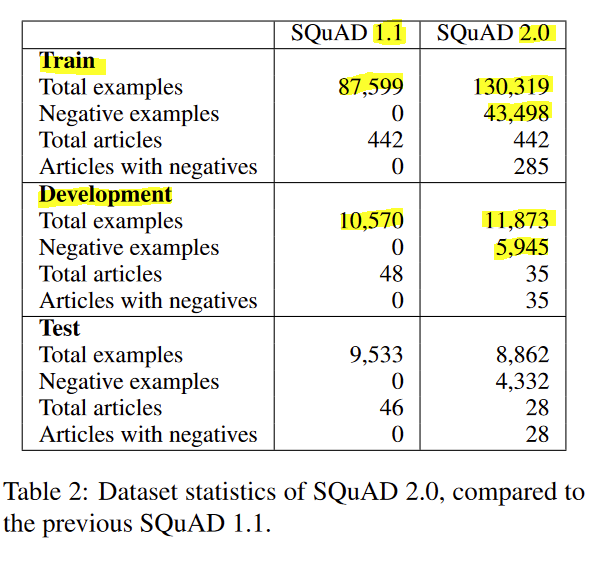

Assim, realmente a quantidade de registros (17.853) do conjunto de valida√ß√£o da vers√£o 1.1 pt, importada via arquivos json (squad-dev-v1.1.json), est√° errada.


In [ ]:
trein_data = squad_utils_v1.json_to_dataframe('squad-train-v1.1.json')
valid_data = squad_utils_v1.json_to_dataframe('squad-dev-v1.1.json')

In [ ]:
import json

# Opening JSON file
f = open('squad-dev-v1.1.json')

# returns JSON object as
# a dictionary
data = json.load(f)

# Iterating through the json
# list
for i in data['data']:
	print(i)

# Closing file
f.close()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Abrindo o arquivo <squad-dev-v1.1.json> e pesquisando por um id que possui mais de um registro, ex.: 5733d3cb4776f419006612eb, temos:

type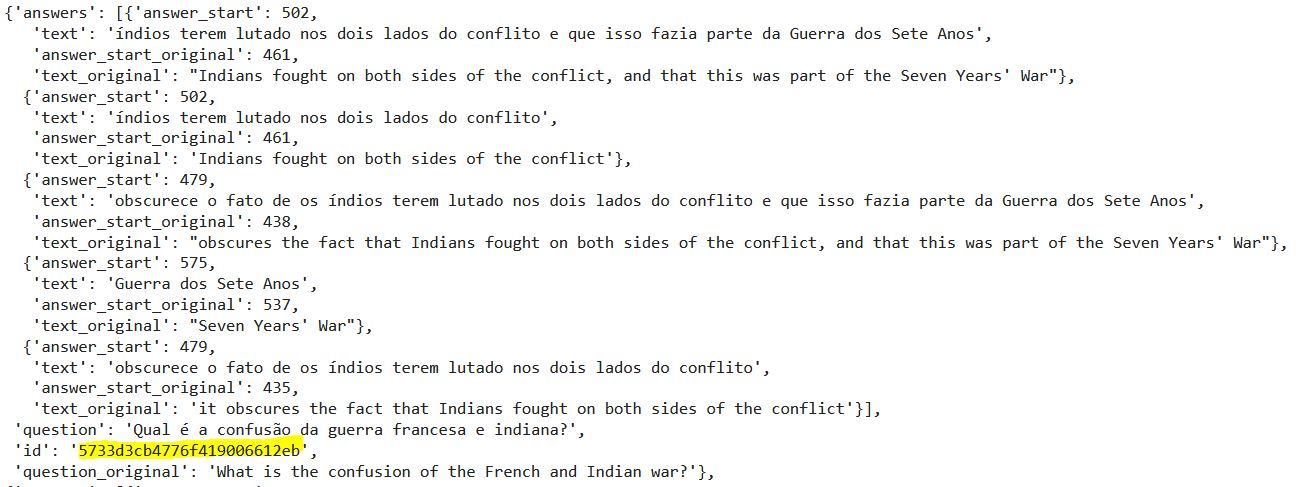

E comparando com o resultado obtido na importa√ß√£o ...

In [ ]:
# Verificando se o conjunto de valida√ß√£o possui o  Id '5733d3cb4776f419006612eb'
valid_data[valid_data['Id'] == '5733d3cb4776f419006612eb']

Id                  title  \
33030  5733d3cb4776f419006612eb  French_and_Indian_War   
33031  5733d3cb4776f419006612eb  French_and_Indian_War   
33032  5733d3cb4776f419006612eb  French_and_Indian_War   
33033  5733d3cb4776f419006612eb  French_and_Indian_War   
33034  5733d3cb4776f419006612eb  French_and_Indian_War   

                                                 context  \
33030  O conflito √© conhecido por v√°rios nomes. Na Am...   
33031  O conflito √© conhecido por v√°rios nomes. Na Am...   
33032  O conflito √© conhecido por v√°rios nomes. Na Am...   
33033  O conflito √© conhecido por v√°rios nomes. Na Am...   
33034  O conflito √© conhecido por v√°rios nomes. Na Am...   

                                              question  ans_start  \
33030  Qual √© a confus√£o da guerra francesa e indiana?        502   
33031  Qual √© a confus√£o da guerra francesa e indiana?        502   
33032  Qual √© a confus√£o da guerra francesa e indiana?        479   
33033  Qual √© a confus√£o da guerra francesa e indiana?        575   
33034  Qual √© a confus√£o da guerra francesa e indiana?        479   

                                                    text  
33030  √≠ndios terem lutado nos dois lados do conflito...  
33031     √≠ndios terem lutado nos dois lados do conflito  
33032  obscurece o fato de os √≠ndios terem lutado nos...  
33033                               Guerra dos Sete Anos  
33034  obscurece o fato de os √≠ndios terem lutado nos...

## Realmente o id em quest√£o possui 5 registros üòØ

### Qual utilizar como verdadeiro?

#### Vamos verificar o id '5733d3cb4776f419006612eb', na com a outra vers√£o 1.1 pt baixada do hunggingface "tgsc/squad-pt-v1.1"

In [ ]:
# Verificando o id '5733d3cb4776f419006612eb' da vers√£o 1.1 pt ("tgsc/squad-pt-v1.1") do hungginface
dataset['validation'].to_pandas()[dataset['validation'].to_pandas()['id'] == '5733d3cb4776f419006612eb']

id                  title  \
368  5733d3cb4776f419006612eb  French_and_Indian_War   

                                               context  \
368  O conflito √© conhecido por v√°rios nomes. Na Am...   

                                            question  \
368  Qual √© a confus√£o da guerra francesa e indiana?   

                                               answers  
368  {'answer_start': [502, 502, 479, 575, 479], 't...

### Bingo!
Realmente o dataset de valida√ß√£o da vers√£o 1.1 tem um problema de v√°rias respostas para  uma mesma pergunta com um mesmo contexto.

# Vamos excluir os registros duplicados - mantendo s√≥ os primeiros - do conjunto de valida√ß√£o da vers√£o 1.1 pt importada via arquivos json (squad-dev-v1.1.json)


In [ ]:
# Contando a quantidade de valores
valid_data.count()

Id           17853
title        17853
context      17853
question     17853
ans_start    17853
text         17853
dtype: int64

In [ ]:
# Registros √∫nicos
valid_data.nunique()

Id           10570
title           48
context       5644
question     10521
ans_start     1344
text         14545
dtype: int64

In [ ]:
# Exclui os registros duplicados mantendo s√≥ os primeiros
valid_data = valid_data.drop_duplicates(subset='Id', keep='first')

In [ ]:
# Quantidade de registros
len(valid_data)

10570

In [ ]:
# Quantidade de registros √∫nicos
valid_data.nunique()

Id           10570
title           48
context       5644
question     10521
ans_start     1344
text         14545
dtype: int64

In [ ]:
# Verificando se o conjunto de valida√ß√£o possui o  Id '5733d3cb4776f419006612eb'
valid_data_[valid_data['Id'] == '5733d3cb4776f419006612eb']

<ipython-input-30-2e9154f2db7a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  valid_data_[valid_data['Id'] == '5733d3cb4776f419006612eb']


Id                  title  \
33030  5733d3cb4776f419006612eb  French_and_Indian_War   

                                                 context  \
33030  O conflito √© conhecido por v√°rios nomes. Na Am...   

                                              question  ans_start  \
33030  Qual √© a confus√£o da guerra francesa e indiana?        502   

                                                    text  
33030  √≠ndios terem lutado nos dois lados do conflito...

## Vamos refazer as duas estrat√©gias utilizadas no in√≠cio desta an√°lise a atualizar os arquivos no hunggingface

## 1¬™ Estrat√©gia - Reajustando o dataset

In [ ]:
# Unindo os datasets de treinamento e valida√ß√£o
dataset = pd.concat([trein_data, valid_data])
# 80% Treinamento, 10% Valida√ß√£o e 10% Testes
import numpy as np
train, validate, test = np.split(dataset.sample(frac=1, random_state=42),[int(.8*len(dataset)), int(.9*len(dataset))])

In [ ]:
# Salva arquivo no disco
train.to_csv('squad_BR_train.csv', encoding='utf-8', index = False)
!cp squad_BR_train.csv "/content/drive/MyDrive/squad_pt/squad_BR_train.csv"
validate.to_csv('squad_BR_valid.csv', encoding='utf-8', index = False)
!cp squad_BR_valid.csv "/content/drive/MyDrive/squad_pt/squad_BR_valid.csv"
test.to_csv('squad_BR_test.csv', encoding='utf-8', index = False)
!cp squad_BR_test.csv "/content/drive/MyDrive/squad_pt/squad_BR_test.csv"

## Os 3 arquivos foram atualizados no [Hungginface](https://huggingface.co/datasets/vsvasconcelos/SQuAD-pt_BR-V1.1)

In [ ]:
dataset_v1_pt = load_dataset("vsvasconcelos/SQuAD-pt_BR-V1.1")
dataset_v1_pt

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 78464
    })
    validation: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 9808
    })
    test: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 9808
    })
})

## 2¬™ Estrat√©gia - Reajustando os dados de valida√ß√£o

In [ ]:
# O dataset de treinamento √© preservado!
train = trein_data
# Pegando as 1¬™ 7K linhas para valida√ß√£o
validate = valid_data[:5500]
# Pegando o restante dos dados originais de valida√ß√£o para testes
test = valid_data[5500:]

In [ ]:
total_dados = len(train) + len(validate) + len(test)
print("Total de dados: ", total_dados)
print("Percentual de dados treinamento: ", round(len(train)/total_dados*100,2))
print("Percentual de dados valida√ß√£o: ", round(len(validate)/total_dados*100,2))
print("Percentual de dados de testes: ", round(len(test)/total_dados*100,2))

Total de dados:  98080
Percentual de dados treinamento:  89.22
Percentual de dados valida√ß√£o:  5.61
Percentual de dados de testes:  5.17


In [ ]:
# Salva arquivo no disco
train.to_csv('squad_BR_train_.csv', encoding='utf-8', index = False)
!cp squad_BR_train_.csv "/content/drive/MyDrive/squad_pt/squad_BR_train_.csv"
validate.to_csv('squad_BR_valid_.csv', encoding='utf-8', index = False)
!cp squad_BR_valid_.csv "/content/drive/MyDrive/squad_pt/squad_BR_valid_.csv"
test.to_csv('squad_BR_test_.csv', encoding='utf-8', index = False)
!cp squad_BR_test_.csv "/content/drive/MyDrive/squad_pt/squad_BR_test_.csv"

### Os 3 arquivos csv gerados foram atualizados no [hunggingface](https://huggingface.co/datasets/vsvasconcelos/SQuAD-pt_BR-V1.1_)

In [ ]:
dataset_v1_pt_ = load_dataset("vsvasconcelos/SQuAD-pt_BR-V1.1_")
dataset_v1_pt_

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 87510
    })
    validation: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 5500
    })
    test: Dataset({
        features: ['Id', 'title', 'context', 'question', 'ans_start', 'text'],
        num_rows: 5070
    })
})